<a href="https://colab.research.google.com/github/hgovrs/Portfolio/blob/master/Analisando_Dados_Airbnb_CHILE_SANTIAGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise dos Dados do Airbnb - Santiago - Chile

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Santiago, Chile, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/chile/rm/santiago/2019-03-15/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood - esta coluna não contém nenhum valor válido
* neighbourhood - Nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar 
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de review por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de  dias de disponibilidadee dentro de 365 dias


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()
df['neighbourhood'].unique()

array(['Santiago', 'Providencia', 'Las Condes', 'Ñuñoa', 'Recoleta',
       'La Florida', 'Estación Central', 'Conchalí', 'Peñalolén',
       'Huechuraba', 'La Reina', 'Lo Barnechea', 'Independencia',
       'San Miguel', 'Vitacura', 'Maipú', 'Cerrillos', 'Renca',
       'Quinta Normal', 'San Joaquín', 'Macul', 'Quilicura',
       'Pedro Aguirre Cerda', 'El Bosque', 'Pudahuel', 'Cerro Navia',
       'Lo Espejo', 'La Cisterna', 'Lo Prado', 'La Granja', 'La Pintana',
       'San Ramón'], dtype=object)

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**



#### Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 35847 entradas e 106 variáveis (`listings.csv.gz`).

In [5]:
# identificar o volume de dados do DataFrame
print(f'Entradas: {df.shape[0]}')
print(f'Variáveis: {df.shape[1]}\n')

# verificar as 5 primeiras entradas do dataset
display(df.dtypes[0:5])


Entradas: 15790
Variáveis: 16



id                       int64
name                    object
host_id                  int64
host_name               object
neighbourhood_group    float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.437619
last_review                       0.437619
name                              0.000887
host_name                         0.000317
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

#### Para identificar a distribuição das variáveis, irei plotar o histograma.

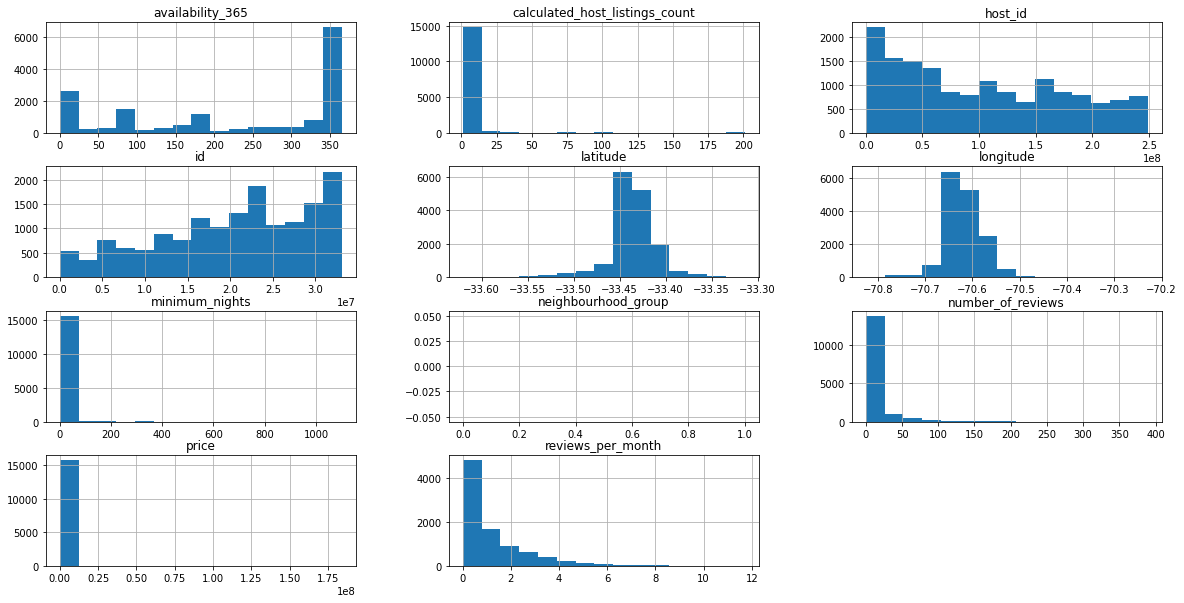

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(20,10));

## Há outliers presentes?

#### Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis price, minimum_nights e calculated_host_listings_count.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

* Resumo estatístico por meio do método describe()
* Plotar boxplots para a variável.


### Boxplot para minimum_nights

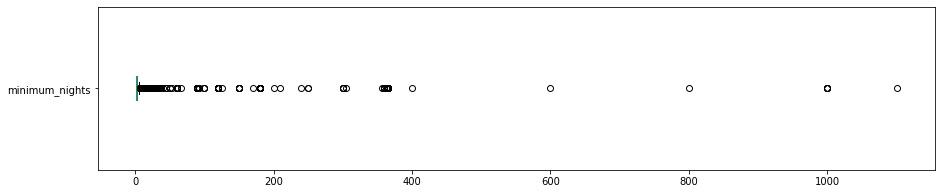

Minimum_nights: valores acima de 30:
 entradas: 226
 1.4313%


In [8]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#ver quanditdadee de valores acima de 30 dias para minimum_nights
print('Minimum_nights: valores acima de 30:')
print(f' entradas: {len(df[df.minimum_nights > 30])}')
print(f' {(len(df[df.minimum_nights > 30]) / df.shape[0])*100:.4f}%')

In [9]:

#resumo estatistico da variável price e minimum_nights
df[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,1.579000e+04,15790.000000
mean,7.127307e+04,5.084864
std,1.574417e+06,29.440156
min,0.000000e+00,1.000000
25%,1.876700e+04,1.000000
50%,3.016100e+04,2.000000
75%,4.021500e+04,3.000000
max,1.838887e+08,1100.000000


Percebe-se que 75% dos imóveis tem o valor de aluguel abaixo de 7.000 pesos chilenos e 75% de minimo do noites é 5 dias.

### Boxplot para price

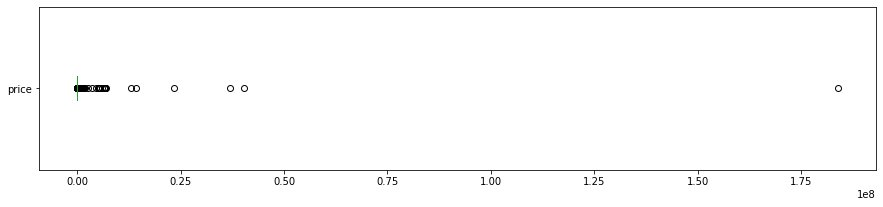

price: valores acima de 200000 mil pesos
entradas 194
1.2286%


In [10]:
#price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

#ver quantidade de valores acima de 200000 para price
print('price: valores acima de 200000 mil pesos')
print(f'entradas {len(df[df.price > 200000])}')
print(f'{(len(df[df.price > 200000]) / df.shape[0])*100:.4f}%')


### Histogramas sem outliers
#### Já que identificamos outliers nas variáveis price e minimum_nights, vamos agora limpar o DataFrame delas e plotar novamente o histograma.

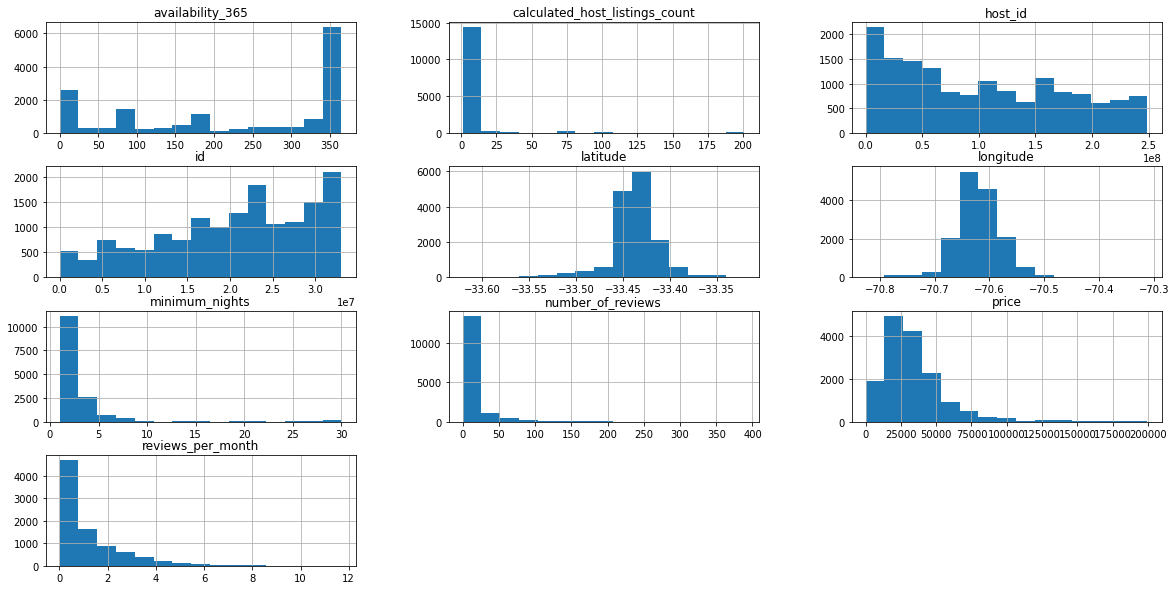

In [11]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 200000].index, axis =0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis =0, inplace = True)

# remover 'neighbourhood_groupm pois está vazio
df_clean.drop('neighbourhood_group', axis = 1, inplace=True)

#plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(20,10));

#### Agora temos uma base melhorada com uma limpeza profunda de outliers e vamos trabalhor com esse novo histograma.

In [12]:
#novo resumo estatistico da variável price e minimum_nights
df_clean[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,15383.000000,15383.000000
mean,33796.428590,2.716700
std,23620.606942,4.119015
min,0.000000,1.000000
25%,18767.000000,1.000000
50%,30161.000000,2.000000
75%,40215.000000,3.000000
max,199734.000000,30.000000



#### Conforme o resume estatístico acima, pode se dizer que:

####Média de preço é : **32.000 mil pesos chilenos**, equivalente a **188 reais**.
####Média de dias alugados é : 2 dias. 



### **Q4. Qual a correlação existente entre as variáveis**

---
Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

Criar uma matriz de correlação
Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn



In [13]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.009201,-0.010814,-0.040054,0.015881,0.066639
minimum_nights,-0.009201,1.000000,-0.035326,-0.102299,-0.043771,-0.020714
number_of_reviews,-0.010814,-0.035326,1.000000,0.617320,-0.014739,0.021268
reviews_per_month,-0.040054,-0.102299,0.617320,1.000000,-0.004017,0.000054
calculated_host_listings_count,0.015881,-0.043771,-0.014739,-0.004017,1.000000,0.176184
availability_365,0.066639,-0.020714,0.021268,0.000054,0.176184,1.000000


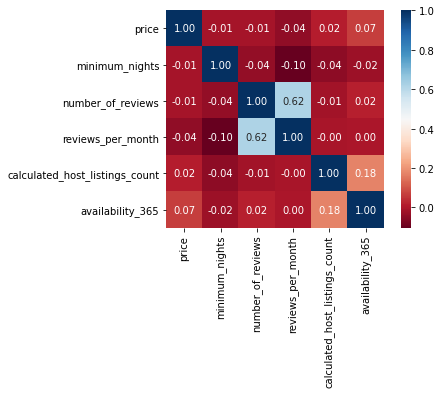

In [14]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor = 'white', annot= True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().italicized text

In [15]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    8584
Private room       6433
Shared room         366
Name: room_type, dtype: int64

In [16]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.558019
Private room       0.418189
Shared room        0.023792
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



Uma maneira de se verificar uma variável em função da outra é usando groupby(). No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.

In [17]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Lo Barnechea    63683.070922
Cerro Navia     59249.800000
Lo Espejo       50555.857143
Quilicura       49134.346154
Vitacura        47704.982234
Las Condes      44213.663283
Conchalí        36997.533333
Maipú           36764.135484
Providencia     35298.633992
Renca           34670.090909
Name: price, dtype: float64

In [18]:
# ver quantidade de imóveis por bairro 
print(df[df.neighbourhood =='Lo Barnechea'].shape )
print(df[df.neighbourhood =='Cerro Navia'].shape)
print(df[df.neighbourhood =='Lo Espejo'].shape)
print(df[df.neighbourhood =='Quilicura'].shape)
print(df[df.neighbourhood =='Vitacura'].shape)
print(df[df.neighbourhood =='Las Condes'].shape)
print(df[df.neighbourhood =='Conchalí'].shape)
print(df[df.neighbourhood =='Maipú'].shape)
print(df[df.neighbourhood =='Providencia'].shape)
print(df[df.neighbourhood =='Renca'].shape)


(165, 16)
(5, 16)
(7, 16)
(52, 16)
(426, 16)
(2448, 16)
(16, 16)
(162, 16)
(3866, 16)
(12, 16)


Verificamos que os bairros, Cerro Navia e Lo Espejo tem pouquíssimos imóveis disponíveis, sendo assim fica difícil ter uma média adequada quando comparada com os outros bairros. Nesse caso segue a lista que mais faz sentido:


In [19]:
#ver as eentradas do bairro Cerro Navia
df[df.neighbourhood =='Cerro Navia']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1422,6370473,Habitación con Baño,33196191,Angel,NaN,Cerro Navia,-33.41798,-70.76462,Private room,30831,1,105,2019-02-23,2.46,2,358
3497,12521576,Pieza pequeña pero acogedora,67728499,Jose,NaN,Cerro Navia,-33.41614,-70.71760,Private room,8713,1,0,NaN,NaN,1,339
10318,24986138,Habitación matrimonial ideal para descansar.,33196191,Angel,NaN,Cerro Navia,-33.41758,-70.76627,Private room,30831,1,4,2019-01-04,0.42,2,364
13513,30689537,Preciosa y cómoda casa en Maintencillo,921444,Paulina,NaN,Cerro Navia,-33.43343,-70.73477,Entire home/apt,150136,7,0,NaN,NaN,1,15
15768,33045249,PRECIOSA PARA DISFRUTAR,248644183,Diego Esteban,NaN,Cerro Navia,-33.42583,-70.72063,Entire home/apt,75738,1,0,NaN,NaN,1,174


2. Lo Espejo, apenas 7 imóveis. Aqui temos valores diferentes porém não muito 
discrepante, então podemos tirar a média normalmente.


In [20]:
#ver as entradas do bairro Lo Espejo
df[df.neighbourhood =='Lo Espejo']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1429,6386713,viaja a la copa america con comodid,33289113,Angela,NaN,Lo Espejo,-33.51676,-70.67502,Private room,75738,1,0,NaN,NaN,1,365
1625,6575014,Casa ideal COPA AMÉRICA,34389531,Macarena,NaN,Lo Espejo,-33.52512,-70.67853,Entire home/apt,63674,1,0,NaN,NaN,1,0
2899,11189042,Departamento excelente y cómodo,58246073,Romina Nataly,NaN,Lo Espejo,-33.52880,-70.68223,Private room,14745,1,0,NaN,NaN,1,365
2968,11207332,Cabaña de campo equipada en parcela,58363241,Erwin Czerwenka,NaN,Lo Espejo,-33.51606,-70.69762,Entire home/apt,20107,1,0,NaN,NaN,1,0
13625,30853703,excelente casa lo espejo,230679815,Miguel,NaN,Lo Espejo,-33.51127,-70.67265,Entire home/apt,109921,1,2,2018-12-23,0.7,1,365
14609,31923610,Haruwen,233811067,Alejandra,NaN,Lo Espejo,-33.51663,-70.70184,Entire home/apt,40215,1,0,NaN,NaN,1,47
14945,32192685,Casa de verano en lo espejo,241568452,Jessica,NaN,Lo Espejo,-33.51390,-70.68621,Entire home/apt,29491,1,0,NaN,NaN,1,168


## Conclusões
A analíse foi feita com base no dataset disponibilizado pelo Airbnb, o objetivo é mostrar o poder da manipulação dos dados, de como conseguimos extrair informações preciosas, que podem auxiliar em  tomadas de decisões, guia turistico e negócios.